## 1.1 Workflow
Start a new Google Colab Notebook and validate the libraries:

*    Validate that Python is at least 3.6.
*    Validate that NumPy is at least 1.18.
*    Validate that pandas is at least 1.0.
*    Validate that TensorFlow is at least 2.2.


In [1]:
import sys
print(sys.version)

3.6.9 (default, Apr 18 2020, 01:56:04) 
[GCC 8.4.0]


In [2]:
import numpy as np
print(np.__version__)

1.18.5


In [3]:
import pandas as pd
print(pd.__version__)

1.0.5


In [4]:
import tensorflow as tf
print(tf.__version__)

2.2.0


## 1.2 Workflow

*    Create a 4 column DataFrame with 10 rows, the first column being a date field and the rest numbers.
*    Fill the first column with the first day of each month for 3 years (for example: 1/1/2018, 2/1/2018).
*    Fill the next 2 columns with random numbers.
*    Fill the 4th column with the difference of the first 2 data columns (for example: Col3 - Col2).
*    Break the DataFrame into 3 different DataFrames based on the dates (for example: 2018, 2019, 2020)



In [5]:
# Generate the column data
import datetime

UPPER_LIMIT = 100

years = range(2017, 2020, 1)
months = range(1, 13, 1)

col1 = [datetime.date(y, m, 1).strftime("%m/%d/%Y") for y in years for m in months]
col2 = np.random.randint(1, UPPER_LIMIT, len(col1))
col3 = np.random.randint(1, UPPER_LIMIT, len(col1))


In [6]:
# Create the dataframe from the columns data
df = pd.DataFrame({"col1": col1, "col2": col2, "col3": col3})
# Add fourth column
df["col4"] = df["col3"] - df["col2"]

In [7]:
df.head()


,col1,col2,col3,col4
0,01/01/2017,42,58,16
1,02/01/2017,48,66,18
2,03/01/2017,30,84,54
3,04/01/2017,34,89,55
4,05/01/2017,63,72,9


In [8]:
# Filter the dataframe
df_2017 = df[df["col1"].str.contains("2017$")]
df_2018 = df[df["col1"].str.contains("2018$")]
df_2019 = df[df["col1"].str.contains("2019$")]

print(df_2017.head())
print(df_2018.head())
print(df_2019.head())

         col1  col2  col3  col4
0  01/01/2017    42    58    16
1  02/01/2017    48    66    18
2  03/01/2017    30    84    54
3  04/01/2017    34    89    55
4  05/01/2017    63    72     9
          col1  col2  col3  col4
12  01/01/2018    17    89    72
13  02/01/2018     1    40    39
14  03/01/2018    87    60   -27
15  04/01/2018    45    69    24
16  05/01/2018    34     7   -27
          col1  col2  col3  col4
24  01/01/2019    93    60   -33
25  02/01/2019    58    65     7
26  03/01/2019    89    71   -18
27  04/01/2019    65    87    22
28  05/01/2019    42    70    28


And now for something completely different, there shall be more Pandas and less Python!

In [9]:
# https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html
#dates_range = pd.date_range('2017-01-01', freq='MS', periods=10)
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.tseries.offsets.DateOffset.html
#dates_range_list = [dates_range + pd.tseries.offsets.DateOffset(years=delta) for delta in range(3)]
# https://stackoverflow.com/questions/55695924/how-to-concatenate-datetimeindex-objects-in-pandas
#dates_index = dates_range_list[0].union_many(dates_range_list[1:])

In [10]:
# Create the date index for 36 months
dates_index = pd.date_range("2017-01-01", freq="MS", periods=36)

# Populate the dataframe
df = pd.DataFrame(
    map(lambda arr: [arr[0], arr[1], arr[1] - arr[0]], ((np.random.randint(0, 100), np.random.randint(0, 100)) for _ in range(len(dates_index)))),
    index=dates_index,
    columns=["col2", "col3", "col3-col2"]
)

df.head()

,col2,col3,col3-col2
2017-01-01,45,14,-31
2017-02-01,13,66,53
2017-03-01,95,35,-60
2017-04-01,40,16,-24
2017-05-01,34,22,-12


In [11]:
# A dataframe for each year
df_2017 = df[df.index.year==2017]
df_2018 = df[df.index.year==2018]
df_2019 = df[df.index.year==2019]

print(df_2018)

            col2  col3  col3-col2
2018-01-01    16    24          8
2018-02-01    36    82         46
2018-03-01    81    11        -70
2018-04-01    78    54        -24
2018-05-01    38    75         37
2018-06-01    78    19        -59
2018-07-01    46    39         -7
2018-08-01    68    25        -43
2018-09-01    92    27        -65
2018-10-01     1    33         32
2018-11-01    32     3        -29
2018-12-01    63    25        -38


## 1.3 Workflow

Create a neural network that can convert Celsius to Fahrenheit and examine the weights.
*        Using TensorFlow and Keras build a single layered network with a single input and a single output and a single neuron.
*        Using NumPy generate ~20 input/output values to test
*        Train the neural network on your data.
*        Test the neural network to see if it is working.
*        Examine the weights to see if they match F=C∗1.8+32F = C * 1.8 + 32F=C∗1.8+32.



In [12]:
# Seed the RNG
RNG_SEED_VALUE = 21
np.random.seed(RNG_SEED_VALUE)
tf.random.set_seed(RNG_SEED_VALUE)

def celsius_to_fahrenheit(t):
  return (t * 1.8) + 32

# Generate the X and Y values for our training data
celsius_X = np.array(np.random.randint(-40, 100, 20), dtype=float)

fahrenheit_Y = np.array([celsius_to_fahrenheit(t) for t in celsius_X], dtype=float)

In [13]:
# Create the model
model = tf.keras.models.Sequential()

# A single layer with a single input
model.add(tf.keras.layers.Dense(1, input_shape=[1]))

# It's a linear regression problem 
model.compile(optimizer=tf.keras.optimizers.Adam(0.1),
              loss=tf.keras.losses.mean_squared_error)

history = model.fit(celsius_X, fahrenheit_Y, epochs=1500, verbose=False)


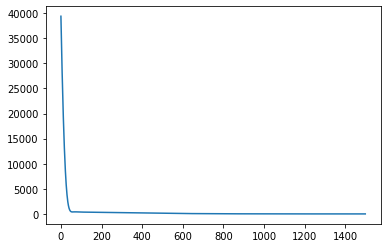

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history["loss"])
plt.show()

In [15]:
# Use the model to make a couple of predictions
# 0C = 32F
# 100C = 212F
model.predict([0, 100])

array([[ 31.313238],
       [212.28024 ]], dtype=float32)

In [16]:
model.get_layer(index=0).get_weights()

[array([[1.8096701]], dtype=float32), array([31.313238], dtype=float32)]

The weights are close to the constants in the formula (1.8, 32).